# h1n1_vaccine: Whether respondent received H1N1 flu vaccine.

Context:
In this dataset, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."

Scope:
The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for h1n1vaccine and one for seasonalvaccine as well as any sophisticates EDAs.


# Variable description:

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import pickle
warnings.filterwarnings("ignore") #---IGNORE ALL WARNINGS
pd.set_option("display.max_columns",None) #----Display number of columns (None -- No restrictions)
pd.set_option('display.max_rows', None)
import os

In [3]:
os.chdir("C:\\Users\\SALESKEN\\Downloads")

In [4]:
os.listdir()

['Anaconda3-2021.05-Windows-x86_64.exe',
 'archive.zip',
 'dbeaver-ce-21.1.5-x86_64-setup.exe',
 'desktop.ini',
 'H1N1_Flu_Vaccines.csv',
 'H1N1_Flu_Vaccines.csv.zip',
 'H1N1_Vaccine.ipynb',
 'Postman-win64-8.11.1-Setup.exe',
 'python-3.9.6-amd64.exe',
 'SlackSetup.exe',
 'vlc-3.0.16-win64.exe',
 'VSCodeUserSetup-x64-1.59.1.exe',
 'winzip25-bing.exe']

In [5]:
df = pd.read_csv("H1N1_Flu_Vaccines.csv")

In [6]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [7]:
df.shape

(26707, 38)

In [8]:
df.describe(include='all')

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,26458.000000,26458.000000,13377,13237,26707.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,10,3,NaN,NaN,21,23,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",NaN,NaN,fcxhlnwr,xtkaffoo,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,NaN,NaN,2468,1778,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,NaN,NaN,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,NaN,NaN,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,0.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [10]:
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [8]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
respondent_id,0,0.000000
h1n1_concern,92,0.344479
h1n1_knowledge,116,0.434343
behavioral_antiviral_meds,71,0.265848
behavioral_avoidance,208,0.778822
behavioral_face_mask,19,0.071142
behavioral_wash_hands,42,0.157262
behavioral_large_gatherings,87,0.325757
behavioral_outside_home,82,0.307036
behavioral_touch_face,128,0.479275


Dropping columns with high missing values and irrelevant variables

In [11]:
df.drop(['health_insurance','employment_occupation','employment_industry','respondent_id','race','hhs_geo_region','seasonal_vaccine','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','doctor_recc_seasonal'], axis = 1, inplace = True)

In [12]:
df.shape

(26707, 27)

In [13]:
df.isnull().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
age_group                         0
education                      1407
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
census_msa                        0
household_adults                249
household_children              249
h1n1_vaccine                      0
dtype: int64

# Analyzing Categoric Variables


In [14]:
#Seperating all categorical variables 
colname=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname.append(x)
colname

['age_group',
 'education',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'census_msa']

# AGE

In [15]:
df.age_group.unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [16]:
dict ={'18 - 34 Years':'Early Adulthood','35 - 44 Years':'Midlife','45 - 54 Years':'Mature Adulthood ','55 - 64 Years':'Senior Adulthood','65+ Years':'Old Aged'}

In [17]:
df['age_group'] = df['age_group'].map(dict)


In [18]:
df.age_group.value_counts()

Old Aged             6843
Senior Adulthood     5563
Mature Adulthood     5238
Early Adulthood      5215
Midlife              3848
Name: age_group, dtype: int64

# EDUCATION

In [19]:
df.education.unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [20]:
edudict = {'< 12 Years':'Secondary','12 Years':'Higher Secondary','Some College':'Pursuing','College Graduate':'Completed'}

In [21]:
df['education'] = df['education'].map(edudict) 

In [22]:
df.education.unique()

array(['Secondary', 'Higher Secondary', 'Completed', 'Pursuing', nan],
      dtype=object)

# sex

In [23]:
df.sex.unique()

array(['Female', 'Male'], dtype=object)

# Income Poverty

In [22]:
df.income_poverty.unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [25]:
incdict = {'<= $75,000, Above Poverty':'Above Poverty', '> $75,000':'Stable Class','Below Poverty':'Below Poverty'}

In [26]:
df['income_poverty']  = df['income_poverty'].map(incdict)

In [27]:
df.income_poverty.unique()

array(['Below Poverty', 'Above Poverty', 'Stable Class', nan],
      dtype=object)

# marital_status

In [28]:
df.marital_status.unique()

array(['Not Married', 'Married', nan], dtype=object)

# rent_or_own

In [29]:
df.rent_or_own.unique()

array(['Own', 'Rent', nan], dtype=object)

# employment_status

In [30]:
df.employment_status.unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

# census_msa

In [31]:
df.census_msa.unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [32]:
#Handling Missing Values

In [33]:
df.isnull().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
age_group                         0
education                      1407
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
census_msa                        0
household_adults                249
household_children              249
h1n1_vaccine                      0
dtype: int64

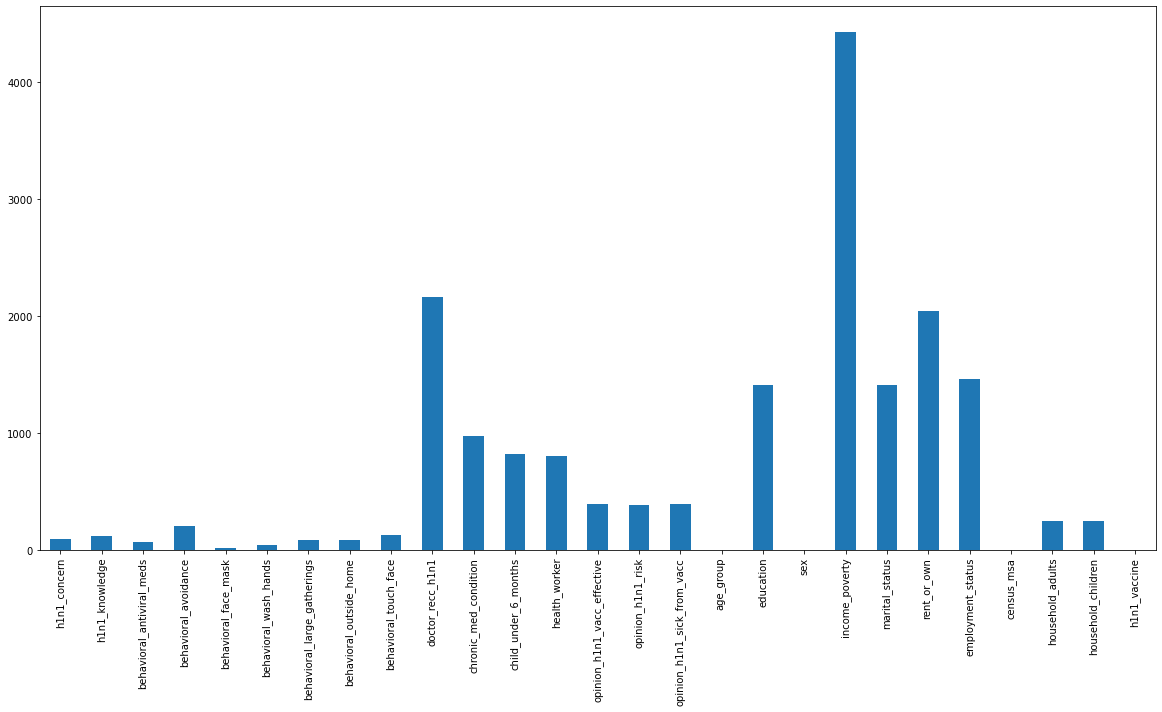

In [34]:
#PLOTTING A GRAPH TO SEE THE MISSING VALUES IN THE DATA
cols = df.isnull().sum()
plt.figure(figsize=(20,10))
cols.plot(kind='bar')
plt.show()

In [37]:
#Extracting columns having more than 1000 missing values
null_cols=[]
for x in df.columns:
    if df[x].isnull().sum()>=1000:
        null_cols.append(x)
print(null_cols)

[]


In [38]:
len(null_cols)

0

# Handling Variables having high missing values

<b><u>Approach<u/></b>

Imputing Variables having 2 classes with mode.
Assigning An Unique Category to variables having multi-classes.
 

In [39]:
#Individually Imputing Missing values on basis of domain knowledge
df['doctor_recc_h1n1'].fillna(df['doctor_recc_h1n1'].median(),inplace=True)
df['education'].fillna('Unkwown',inplace=True)
df['income_poverty'].fillna('Not Specified',inplace=True)
df['rent_or_own'].fillna(df['rent_or_own'].mode()[0],inplace=True)
df['employment_status'].fillna('Unavailable',inplace=True)
df['marital_status'].fillna(df['marital_status'].mode()[0],inplace=True)

In [40]:
df.isnull().sum()

h1n1_concern                    92
h1n1_knowledge                 116
behavioral_antiviral_meds       71
behavioral_avoidance           208
behavioral_face_mask            19
behavioral_wash_hands           42
behavioral_large_gatherings     87
behavioral_outside_home         82
behavioral_touch_face          128
doctor_recc_h1n1                 0
chronic_med_condition          971
child_under_6_months           820
health_worker                  804
opinion_h1n1_vacc_effective    391
opinion_h1n1_risk              388
opinion_h1n1_sick_from_vacc    395
age_group                        0
education                        0
sex                              0
income_poverty                   0
marital_status                   0
rent_or_own                      0
employment_status                0
census_msa                       0
household_adults               249
household_children             249
h1n1_vaccine                     0
dtype: int64

In [41]:
for x in df.columns:
    if df[x].dtype=='object' or df[x].dtype=='bool':
        df[x].fillna(df[x].mode()[0],inplace=True)
    elif df[x].dtype=='int64' or df[x].dtype=='float64':
        df[x].fillna(round(df[x].mean()),inplace=True)

In [42]:
df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
age_group                      0
education                      0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
census_msa                     0
household_adults               0
household_children             0
h1n1_vaccine                   0
dtype: int64

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64


<AxesSubplot:ylabel='h1n1_vaccine'>

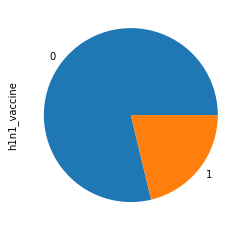

In [43]:
print(df.h1n1_vaccine.value_counts())
df.h1n1_vaccine.value_counts().plot.pie()

**<u>NOTE:</u>**
Dataset seems imbalance.
We will use SMOTE later inorder to balance out.




<b><u>DATA VISUALIZATION<u/></b>

# Gender related with vaccination?

<AxesSubplot:xlabel='sex', ylabel='count'>

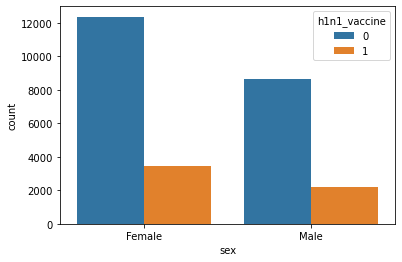

In [44]:
sns.countplot(x="sex", data=df, hue = "h1n1_vaccine")

females recieved more h1n1 vaccines incompared to the males

# Awareness of H1n1 vaccination w.r.t Gender

<AxesSubplot:xlabel='h1n1_knowledge', ylabel='count'>

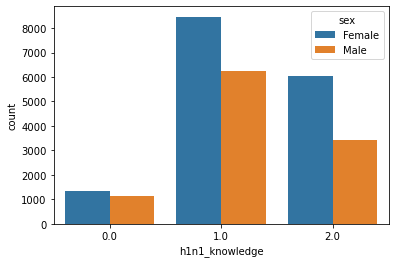

In [45]:
sns.countplot(x="h1n1_knowledge", data=df, hue = "sex")

Females seemed to be more aware with H1N1 flu vaccination.

# Being a health worker relates to vaccination?

<AxesSubplot:xlabel='health_worker', ylabel='count'>

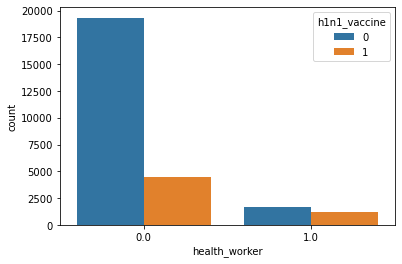

In [46]:
sns.countplot(x="health_worker", data=df, hue = "h1n1_vaccine")

Most of the health workers did get the H1N1 vaccination

# Education Level w.r.t Gender

<AxesSubplot:xlabel='sex', ylabel='count'>

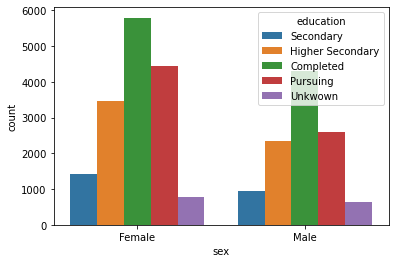

In [47]:
sns.countplot(x="sex", data=df, hue = "education")

Females seemed to be more educated than the males.

# Which Gender got more recommendation for H1N1 vaccination?

<AxesSubplot:xlabel='sex', ylabel='count'>

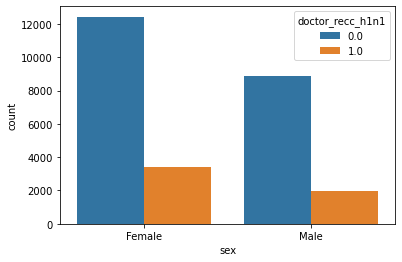

In [48]:
sns.countplot(x="sex", data=df, hue = "doctor_recc_h1n1")

Doctors recommended more no.of females for H1N1 vaccination

# Which Gender had more Chronic medical conditions?

<AxesSubplot:xlabel='sex', ylabel='count'>

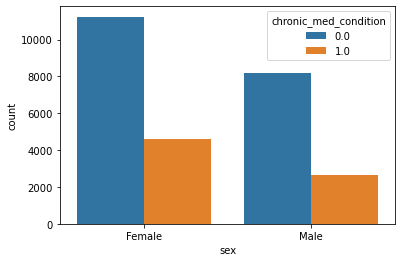

In [49]:
sns.countplot(x="sex", data=df, hue = "chronic_med_condition")

Females are more proned to chronic medical conditions

# Being married relates to vaccination?

<AxesSubplot:xlabel='marital_status', ylabel='count'>

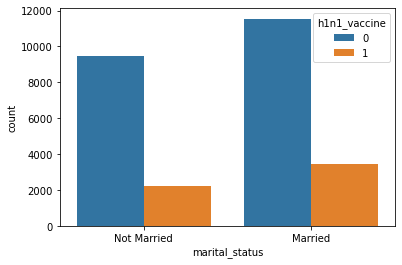

In [50]:
sns.countplot(x="marital_status", data=df, hue = "h1n1_vaccine")

Marriage doesnt affects much if a person takes H1N1 vaccination or not.

# Education related to vaccination?

<AxesSubplot:xlabel='education', ylabel='h1n1_vaccine'>

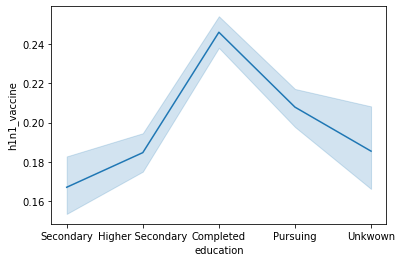

In [51]:
sns.lineplot("education", "h1n1_vaccine", data=df)

Education is directly related whether a person gets vaccinated or not.

# Which Age-group got more vaccination?

<AxesSubplot:xlabel='age_group', ylabel='h1n1_vaccine'>

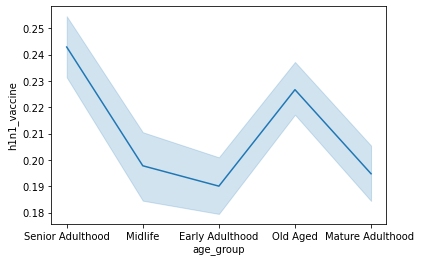

In [52]:
sns.lineplot("age_group", "h1n1_vaccine", data=df)

# Vaccination w.r.t Knowledge 

<AxesSubplot:xlabel='h1n1_knowledge', ylabel='h1n1_vaccine'>

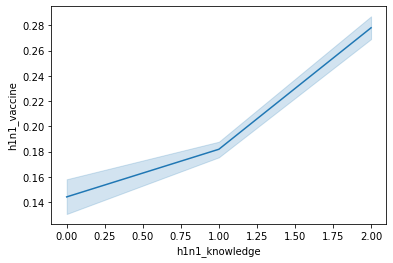

In [53]:
sns.lineplot("h1n1_knowledge", "h1n1_vaccine", data=df)

Knowledge relates whethere a person is taking H1N1 vaccination or not.

# Residence vs vaccination

<AxesSubplot:xlabel='census_msa', ylabel='count'>

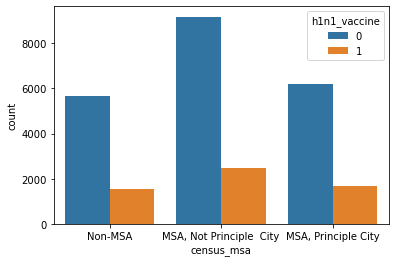

In [54]:
sns.countplot(x="census_msa", data=df, hue = "h1n1_vaccine")

More number of people from MSA(Non-Principal city) took H1n1vaccination

# Age-group count 

<AxesSubplot:ylabel='age_group'>

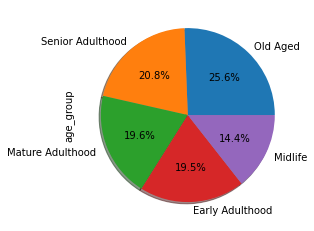

In [55]:
df.age_group.value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True)

There are high Old Aged peoples incompared to other age-groups

# Poverty Ratio

<AxesSubplot:ylabel='income_poverty'>

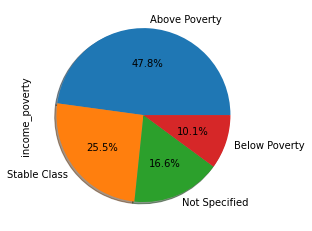

In [56]:
df.income_poverty.value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True)

Almost half of the citizens were above poverty level.

# Respondent's residence

<AxesSubplot:ylabel='census_msa'>

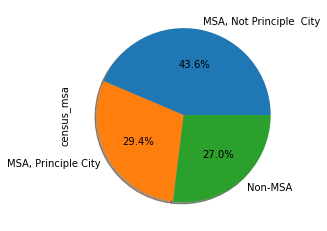

In [57]:
df.census_msa.value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True)

<AxesSubplot:ylabel='education'>

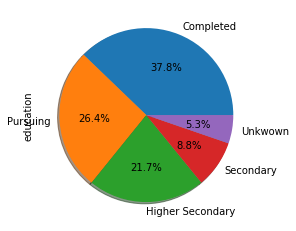

In [58]:
df.education.value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

Most of the citizens are Educated

In [59]:
df_categorical=[]
df_numerical=[]

for x in df:
    if df[x].dtypes=="object":
        df_categorical.append(x)
    elif df[x].dtypes=="int64" or df[x].dtypes=="float64":
        df_numerical.append(x)

In [60]:
print(df_categorical)
print()
print(df_numerical)

['age_group', 'education', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']

['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults', 'household_children', 'h1n1_vaccine']


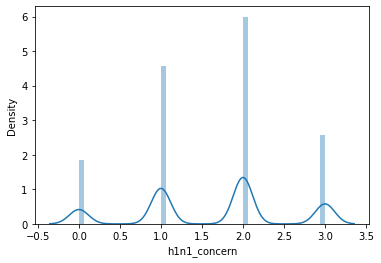

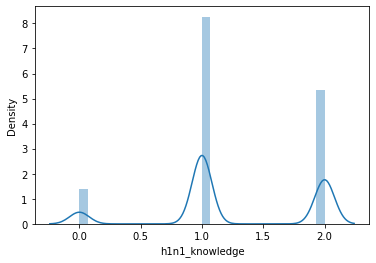

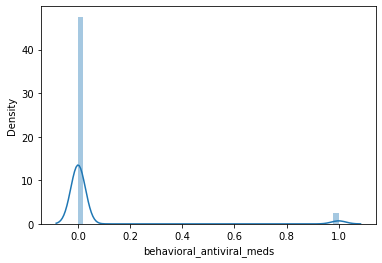

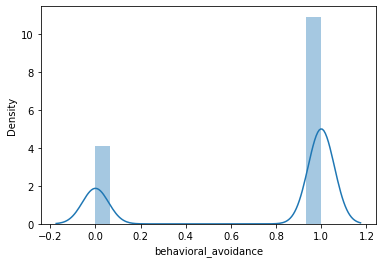

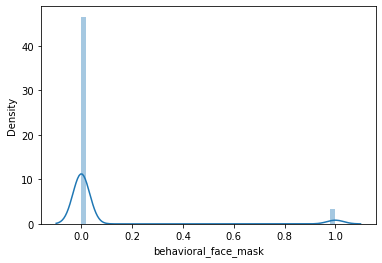

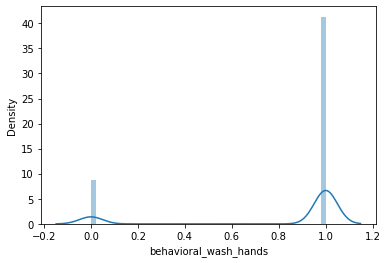

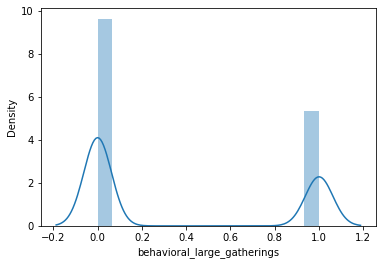

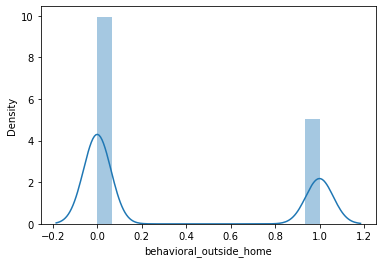

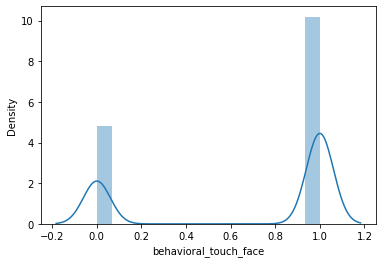

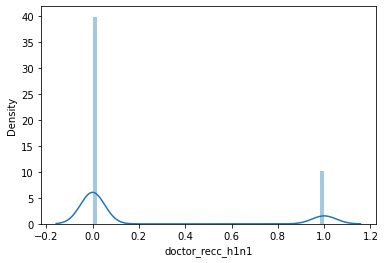

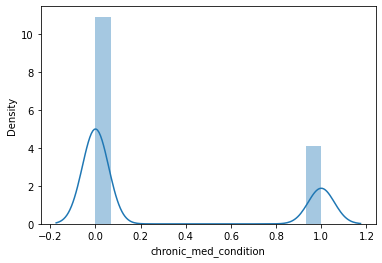

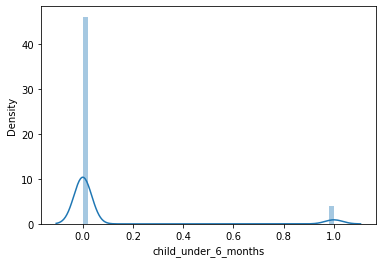

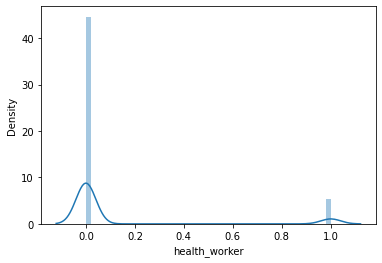

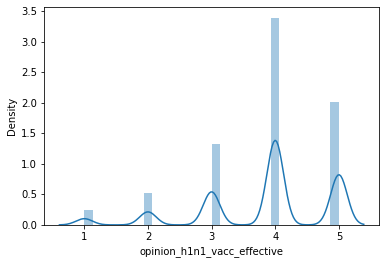

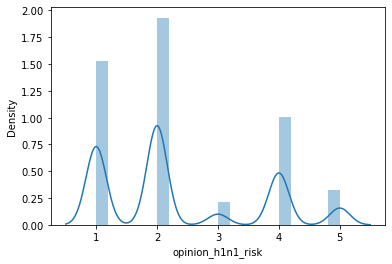

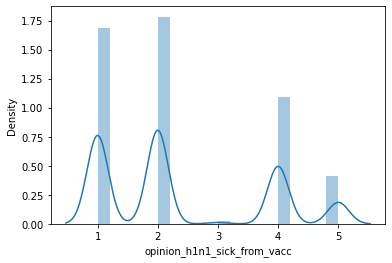

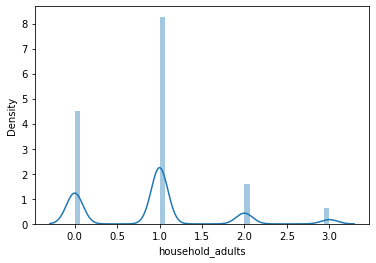

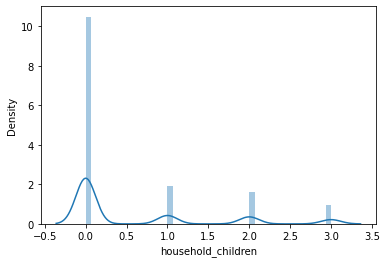

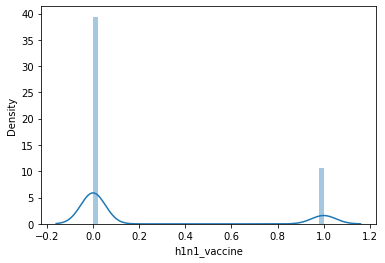

In [63]:
for i in df_numerical:
    sns.distplot(df[i])
    plt.show()

In [64]:
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,education,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,Senior Adulthood,Secondary,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,Midlife,Higher Secondary,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,Early Adulthood,Completed,Male,Above Poverty,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,Old Aged,Higher Secondary,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,Mature Adulthood,Pursuing,Female,Above Poverty,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


There are few outliers in the data set but we cannot drop or replace it as these values are real.

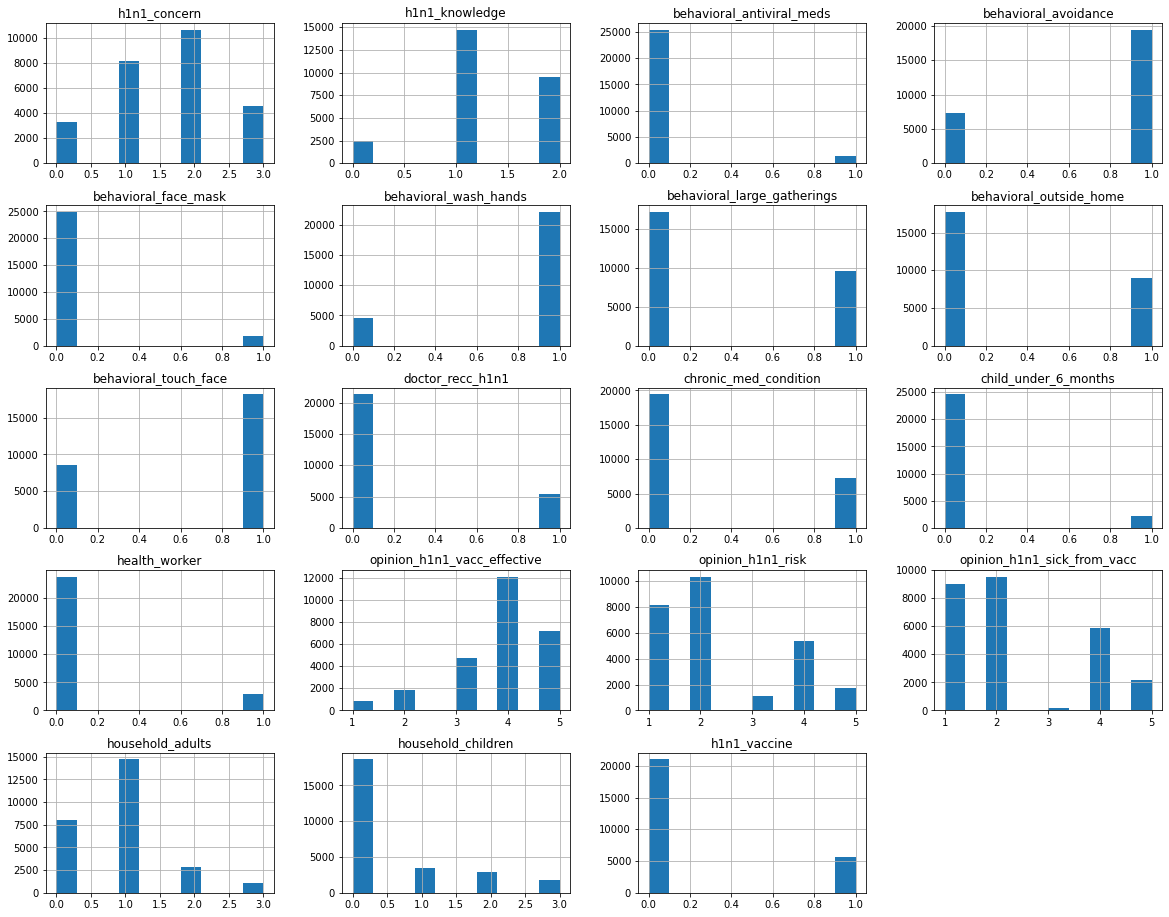

In [66]:
df.hist(figsize=(20,16))
plt.show()

In [67]:
numerical_feature=[]
for i in df:
    if df[i].dtype!="object":
     numerical_feature.append(i)
print(numerical_feature)

['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults', 'household_children', 'h1n1_vaccine']


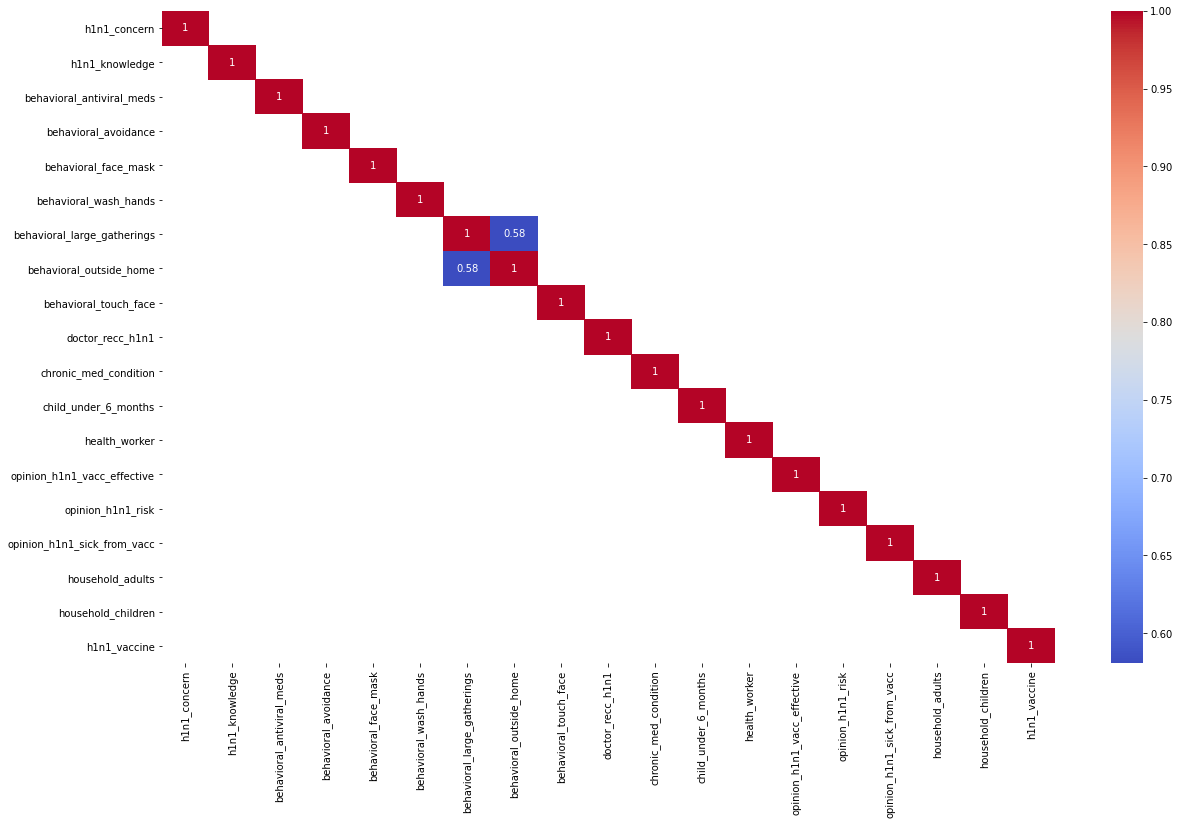

In [68]:
#CHECKING THE COR-RELATION OF THE WHOLE DATA
#filter numeric column only 
data_num = df[numerical_feature]

#calculating correlation among numeric variable 
corr_matrix = data_num.corr() 

#filter correlation values above 0.5
filter_corr = corr_matrix[corr_matrix > 0.5]

#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(filter_corr,cmap='coolwarm',annot=True);

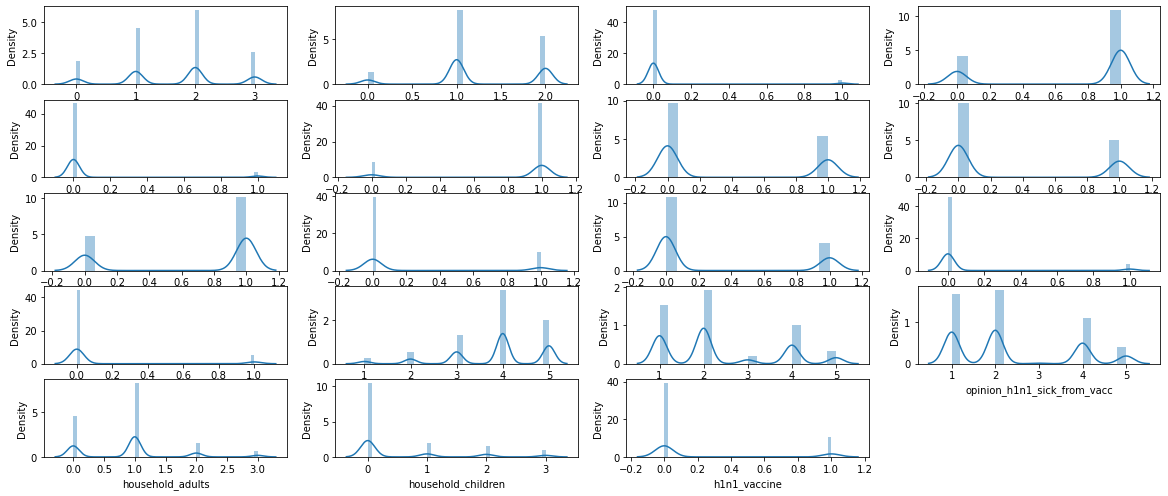

In [76]:
plt.figure(figsize=(20,10))
i = 1
for x in df.columns:
    if df[x].dtypes != 'O':
        plt.subplot(6,4,i)
        sns.distplot(df[x])
        i+=1

In [72]:
df.shape

(26707, 27)

In [77]:
#Convert categorical variables to numeric :
#Seperating all categorical variables to convert from categorical to numeric
colname=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname.append(x)
colname

['age_group',
 'education',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'census_msa']

In [78]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    df[x]=le.fit_transform(df[x])

In [80]:
df.head(5)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,education,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,4,3,0,1,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,2,1,1,1,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,0,0,1,0,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,3,1,0,1,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,1,2,0,0,0,0,0,0,1.0,0.0,0


In [81]:
#Creating X and Y
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [79]:
X.shape

(26707, 26)

In [80]:
Y.shape

(26707,)

[0.0488825  0.03521474 0.01116823 0.02440975 0.01299963 0.01393179
 0.02394644 0.0251851  0.02440173 0.1267109  0.02088483 0.01395973
 0.02398559 0.07175131 0.08581925 0.05154744 0.05640755 0.05152608
 0.02879693 0.04204163 0.02175111 0.0206702  0.03729449 0.04931429
 0.04052593 0.0368728 ]


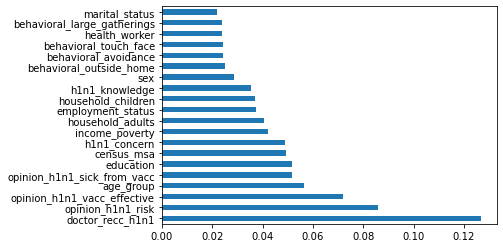

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [83]:
Y = Y.astype(int)

In [84]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))

#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)

import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

h1n1_concern                  -0.164118
h1n1_knowledge                -0.234241
behavioral_antiviral_meds      4.192763
behavioral_avoidance          -1.023320
behavioral_face_mask           3.403061
behavioral_wash_hands         -1.718796
behavioral_large_gatherings    0.594790
behavioral_outside_home        0.693094
behavioral_touch_face         -0.765894
doctor_recc_h1n1               1.480653
chronic_med_condition          1.019292
child_under_6_months           3.094932
health_worker                  2.516794
opinion_h1n1_vacc_effective   -0.915407
opinion_h1n1_risk              0.688226
opinion_h1n1_sick_from_vacc    0.666566
age_group                     -0.124722
education                      0.628281
sex                            0.381884
income_poverty                 0.365959
marital_status                 0.242831
rent_or_own                    1.337841
employment_status              1.312014
census_msa                     0.316637
household_adults               0.785769


In [90]:

numerical_feature=[]
for i in df:
    if df[i].dtype!="object":
     numerical_feature.append(i)
print(numerical_feature)

['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'age_group', 'education', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa', 'household_adults', 'household_children', 'h1n1_vaccine']


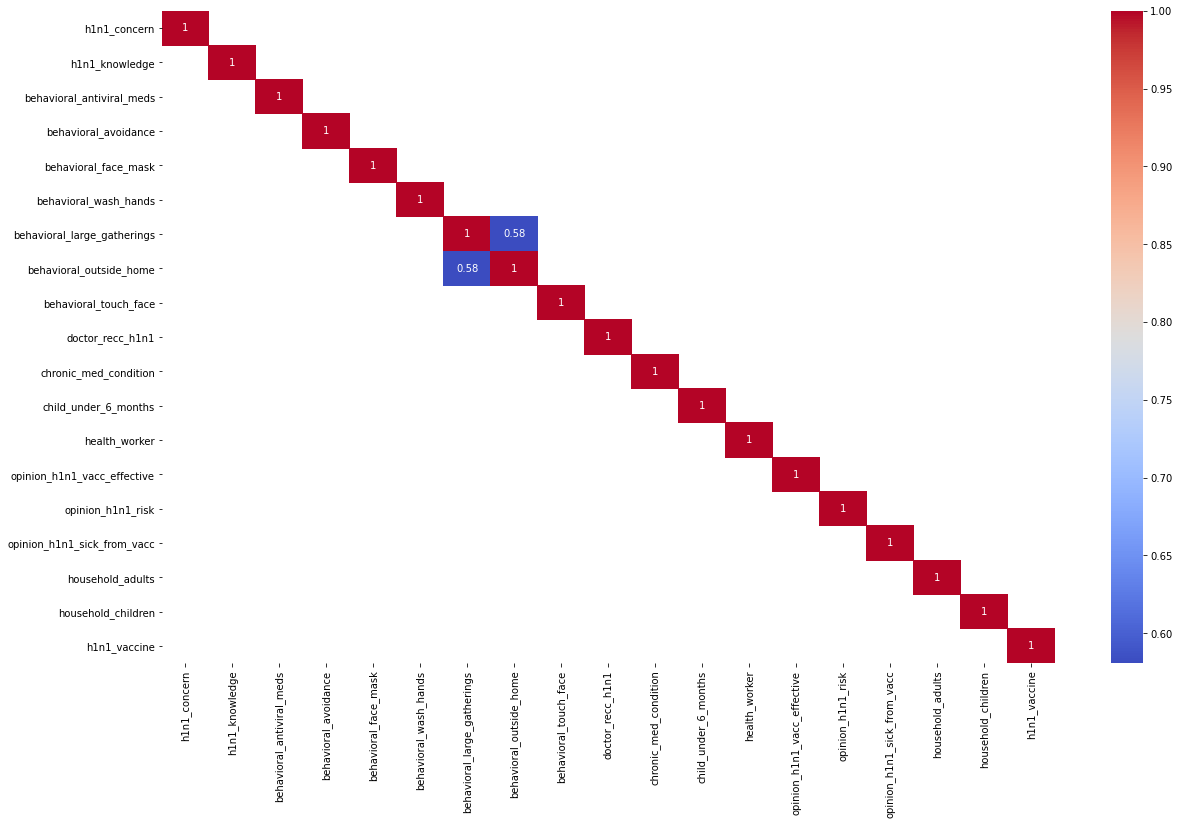

In [92]:
#CHECKING THE COR-RELATION OF THE WHOLE DATA
#filter numeric column only 
data_num = df[df_numerical]

#calculating correlation among numeric variable 
corr_matrix = data_num.corr() 

#filter correlation values above 0.5
filter_corr = corr_matrix[corr_matrix > 0.5]

#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(filter_corr,cmap='coolwarm',annot=True);

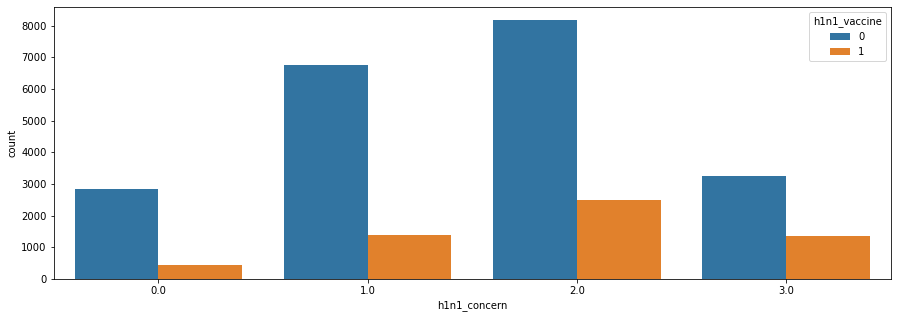

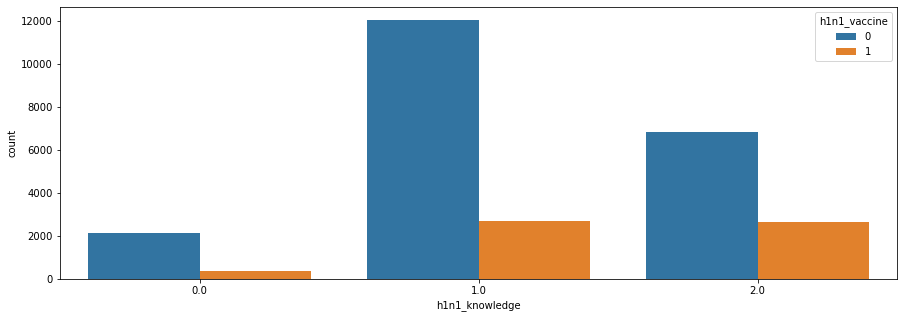

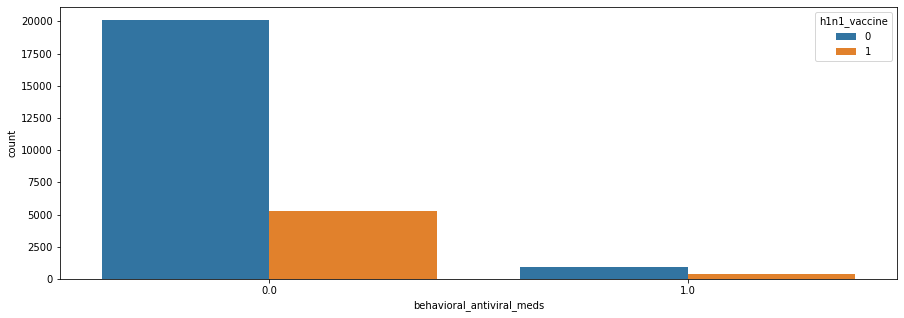

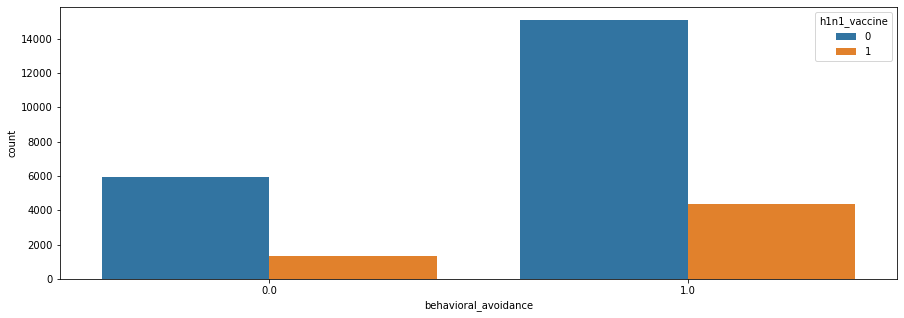

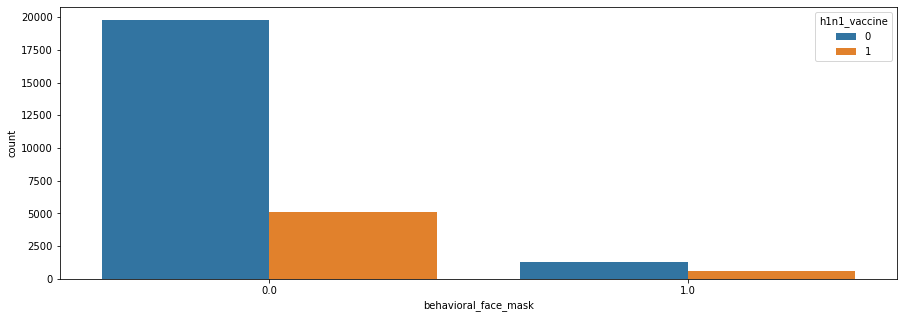

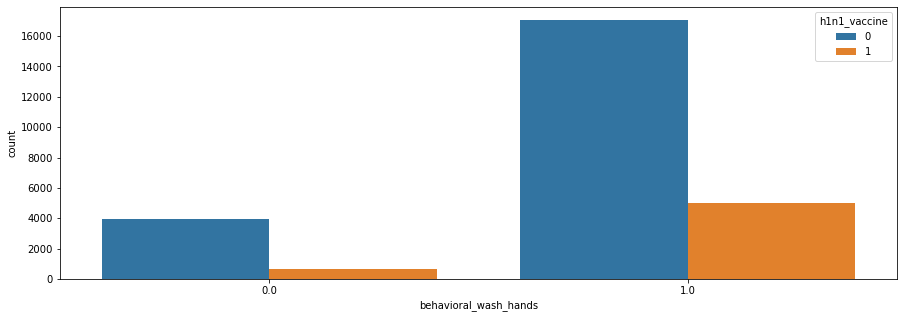

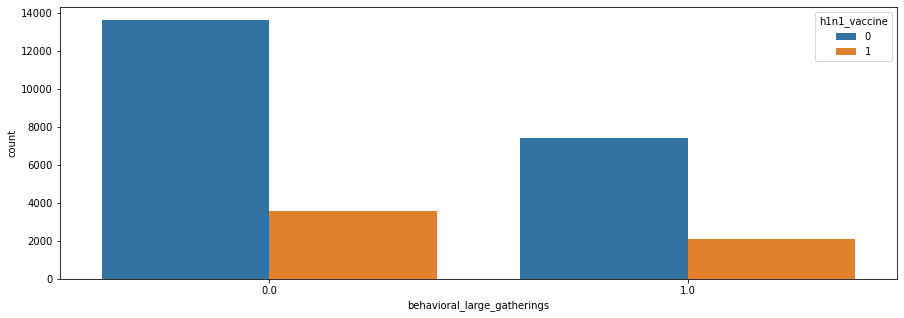

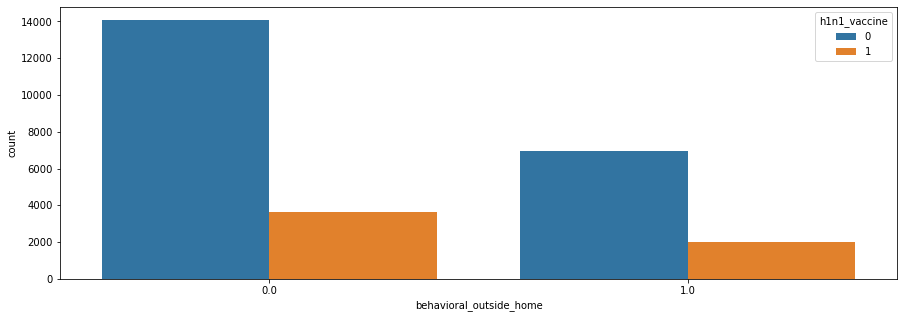

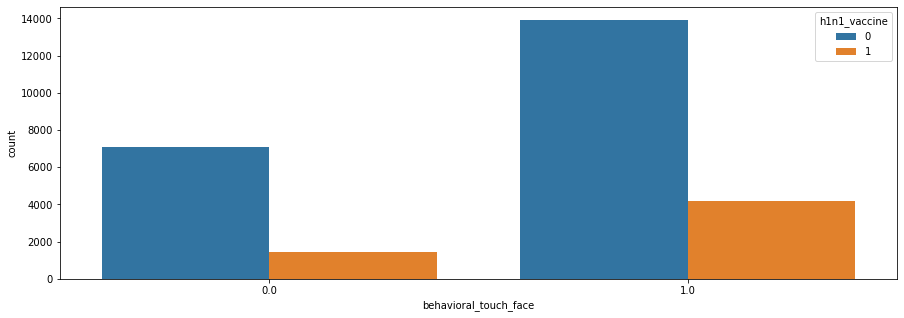

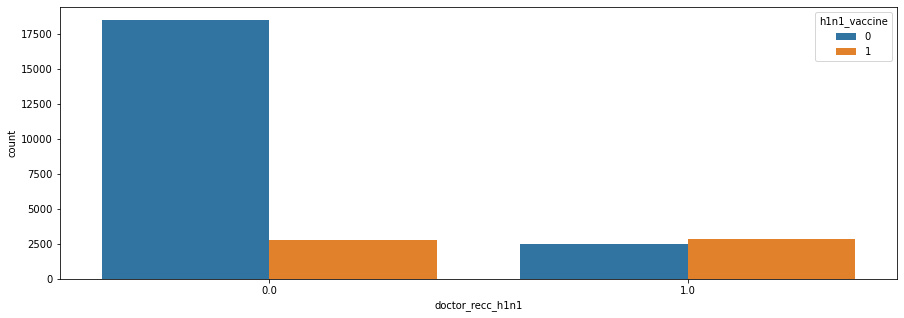

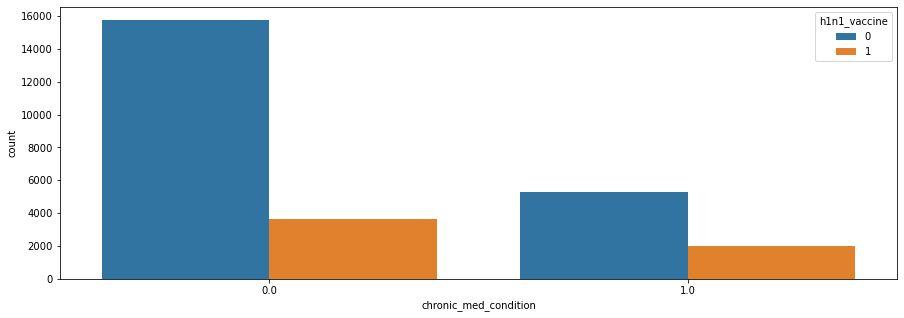

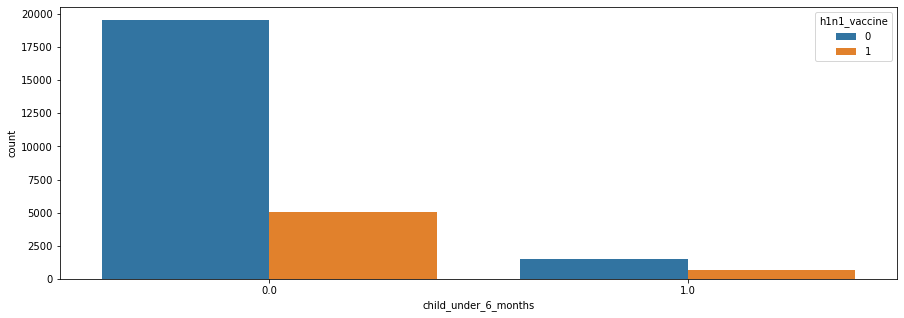

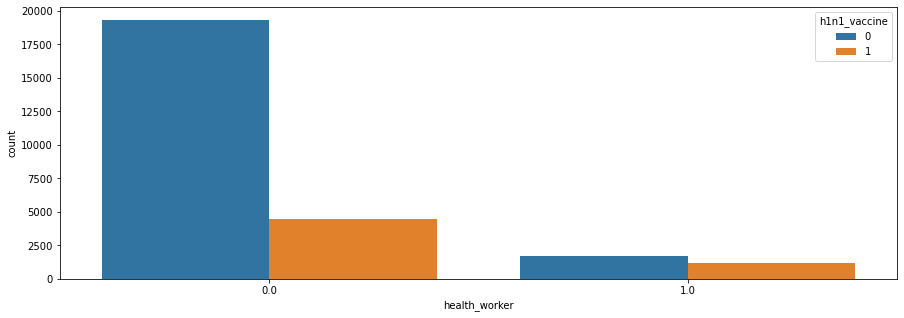

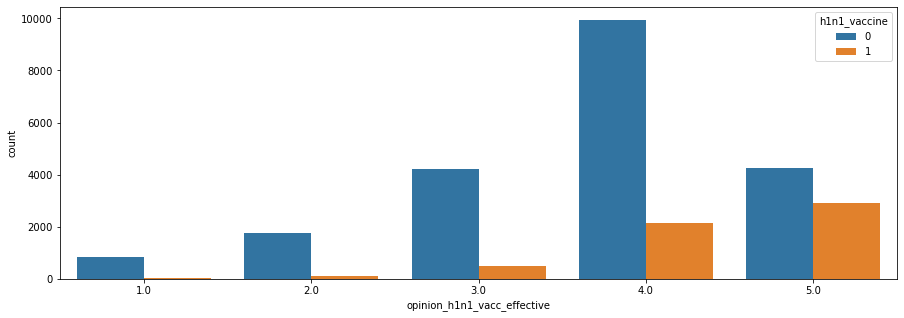

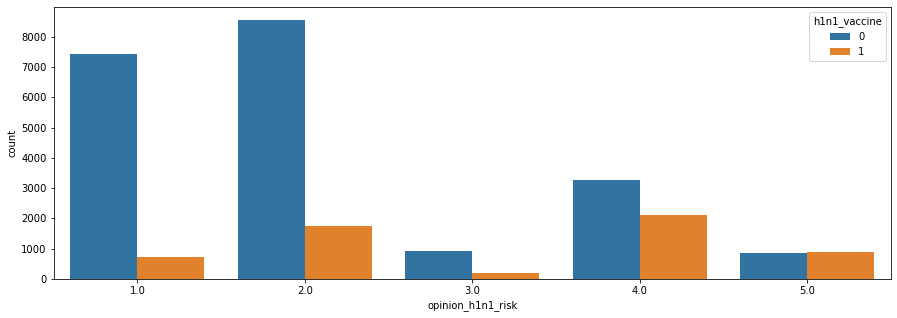

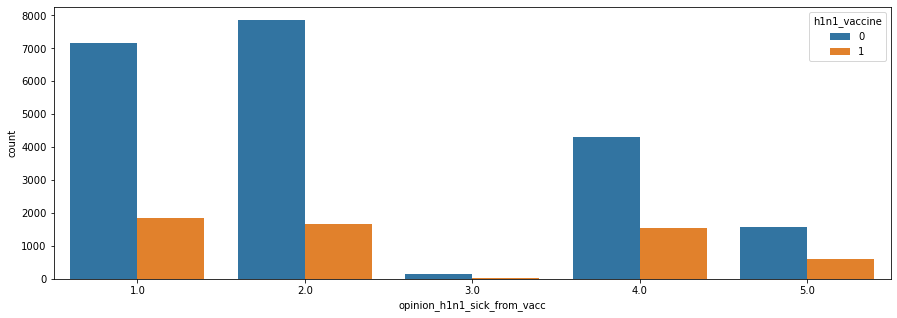

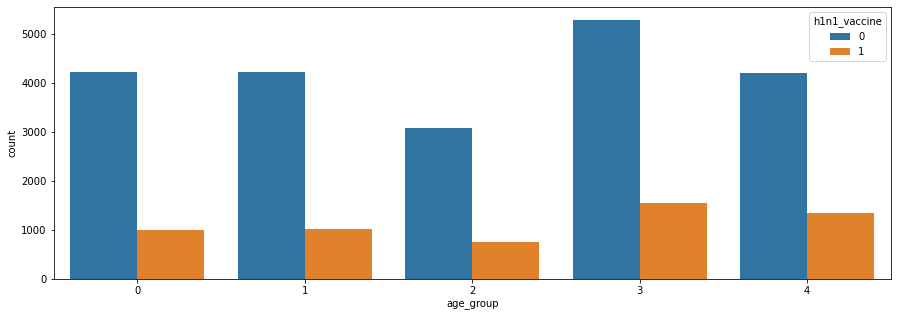

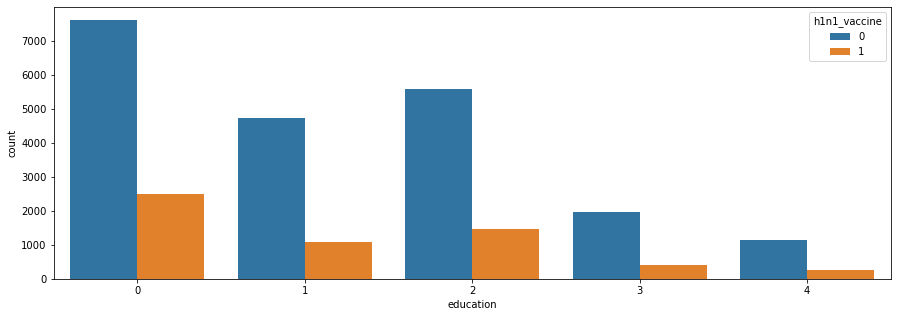

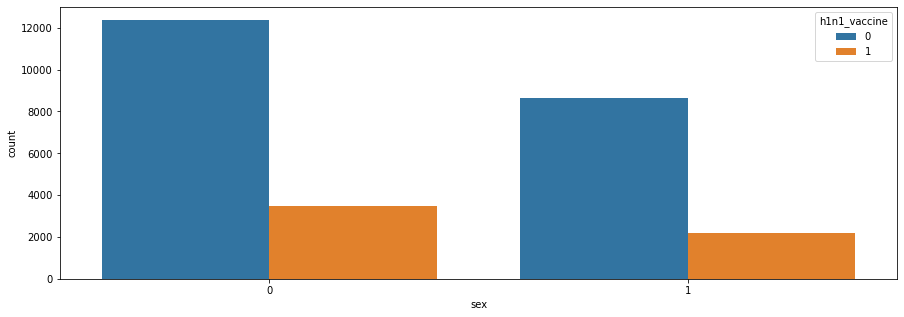

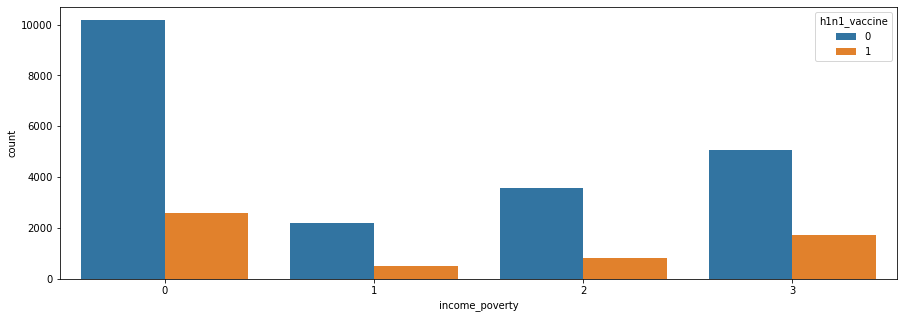

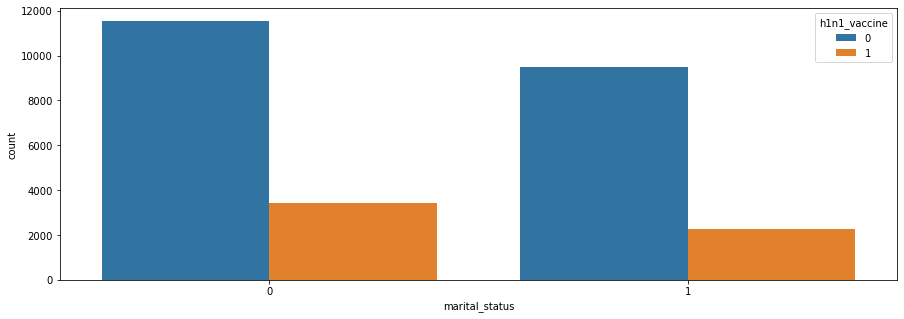

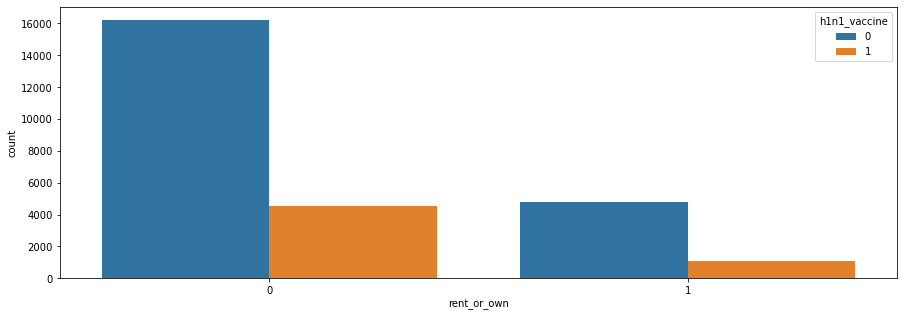

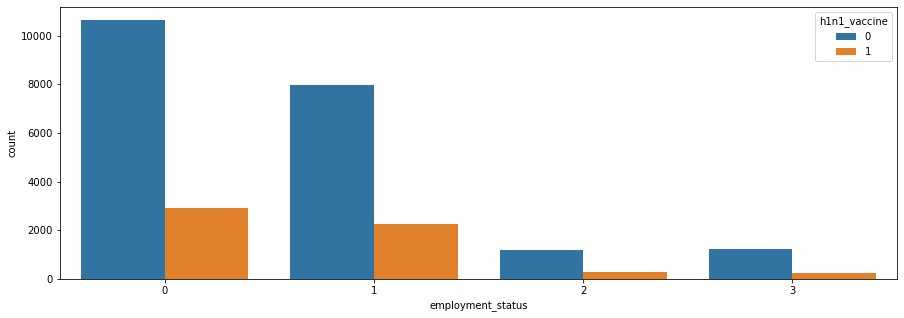

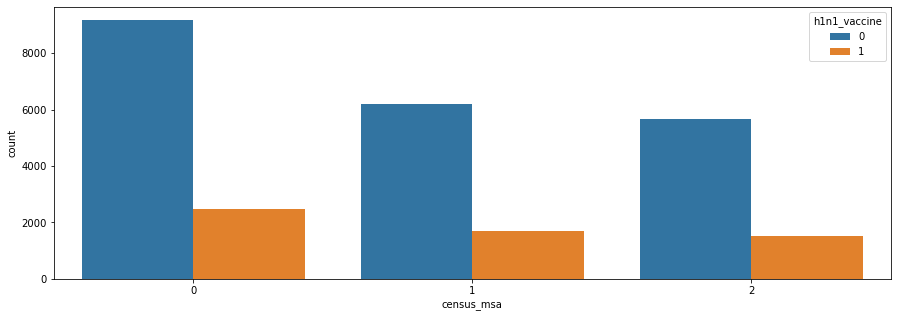

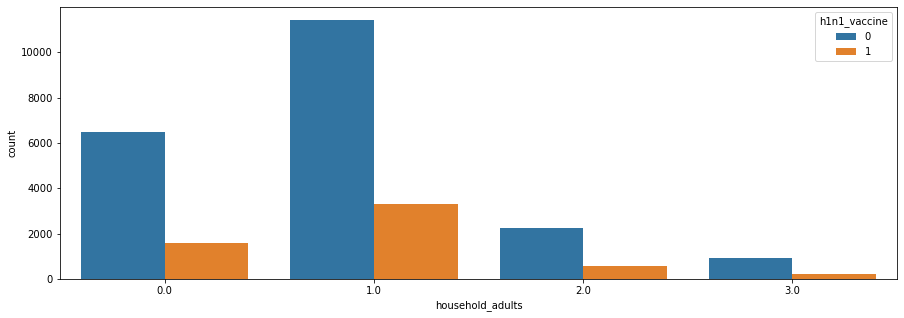

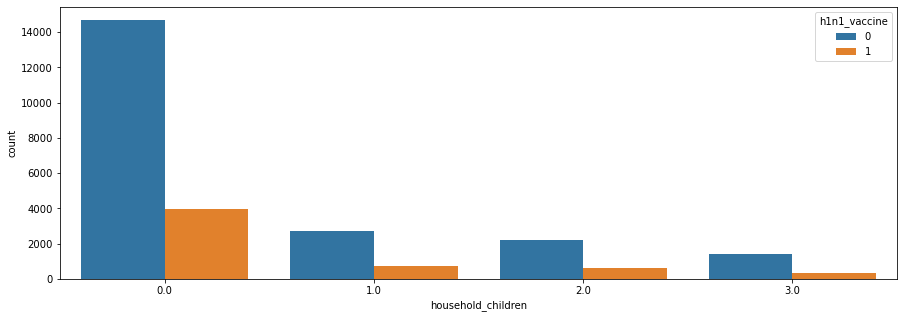

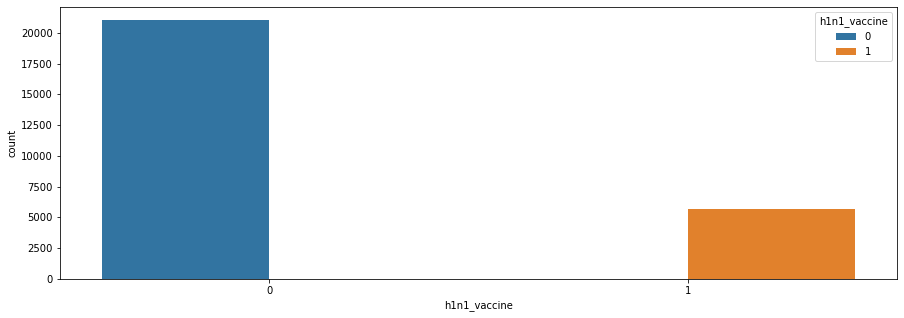

In [93]:
# looping through all columns except the target col
for col in df.columns:
    #plot size
    plt.figure(figsize=(15,5))
    sns.countplot(data = df, x = col ,hue = df.columns[-1])